In [1]:
!pip install gdown kaggle
import os
import shutil

  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105787 sha256=73bc7e4859f37545af3d8a0138805dac66584bd3359e57163da22bc9cb184200
  Stored in directory: /root/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
# Create .kaggle directory if it doesn't exist
kaggle_dir = os.path.expanduser('~/.kaggle')
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

In [3]:
# Path to your kaggle.json file
kaggle_json_path = 'kaggle.json'  # Replace with the actual path to your kaggle.json file

# Move kaggle.json to ~/.kaggle/
shutil.move(kaggle_json_path, os.path.join(kaggle_dir, 'kaggle.json'))

'/root/.kaggle/kaggle.json'

In [4]:
# Set the permissions for the kaggle.json file
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)

In [5]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip skin-cancer-mnist-ham10000.zip

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100%|█████████████████████████████████████▉| 5.20G/5.20G [02:36<00:00, 34.1MB/s]
100%|██████████████████████████████████████| 5.20G/5.20G [02:36<00:00, 35.7MB/s]
Archive:  skin-cancer-mnist-ham10000.zip
  inflating: HAM10000_images_part_1/ISIC_0024306.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024307.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024308.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024309.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024310.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024311.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024312.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024313.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024314.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024315.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024316.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024317.jpg  
  inflating: HAM10000_images_p

In [6]:
!pip install matplotlib numpy pandas seaborn pillow scikit-learn keras tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 144.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 192.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 180.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 151.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 192.2 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
np.random.seed(123)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras import backend as K

2025-02-12 19:57:54.661766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739390274.676394     394 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739390274.680815     394 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-12 19:57:54.697547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil

In [10]:
os.listdir()
base_dir = 'base_dir'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)



# create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [11]:
df = pd.read_csv('HAM10000_metadata.csv')


In [12]:
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout,Conv2D,MaxPooling2D,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50

In [13]:
IMG_SIZE = 128 
BATCH_SIZE = 128 
DATASET_DIR_1 = 'HAM10000_images_part_1/'
DATASET_DIR_2 = 'HAM10000_images_part_2/'
metadata_path = 'HAM10000_metadata.csv'
paths = [DATASET_DIR_1,DATASET_DIR_2]

In [14]:
df = pd.read_csv(metadata_path)

In [15]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [16]:
def get_full_image_path(filename):
#     print(os.path.join(DATASET_DIR_1, filename +'.jpg'))
    if os.path.exists(os.path.join(DATASET_DIR_1, filename+'.jpg')):
        return os.path.join(DATASET_DIR_1, filename+'.jpg')
    elif os.path.exists(os.path.join(DATASET_DIR_2, filename+'.jpg')):
        return os.path.join(DATASET_DIR_2, filename+'.jpg')
    else:
        return None  # or handle missing files as needed

df['image_id'] = df['image_id'].apply(get_full_image_path)

In [17]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,HAM10000_images_part_1/ISIC_0027419.jpg,bkl,histo,80.0,male,scalp
1,HAM_0000118,HAM10000_images_part_1/ISIC_0025030.jpg,bkl,histo,80.0,male,scalp
2,HAM_0002730,HAM10000_images_part_1/ISIC_0026769.jpg,bkl,histo,80.0,male,scalp
3,HAM_0002730,HAM10000_images_part_1/ISIC_0025661.jpg,bkl,histo,80.0,male,scalp
4,HAM_0001466,HAM10000_images_part_2/ISIC_0031633.jpg,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,HAM10000_images_part_2/ISIC_0033084.jpg,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,HAM10000_images_part_2/ISIC_0033550.jpg,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,HAM10000_images_part_2/ISIC_0033536.jpg,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,HAM10000_images_part_2/ISIC_0032854.jpg,akiec,histo,80.0,male,face


In [18]:
unique_labels = np.unique(df['dx'])
print(unique_labels)
for label in unique_labels:
    print(f"no of samples of class {label} : {list(df['dx']).count(label)}")

['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
no of samples of class akiec : 327
no of samples of class bcc : 514
no of samples of class bkl : 1099
no of samples of class df : 115
no of samples of class mel : 1113
no of samples of class nv : 6705
no of samples of class vasc : 142


Text(0.5, 1.0, 'Frequency Distribution of Classes')

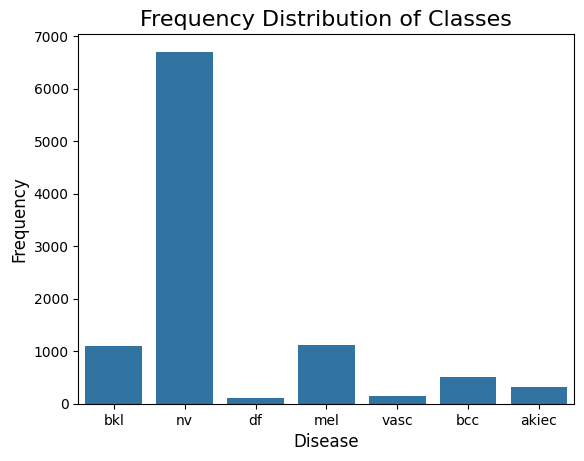

In [19]:
sns.countplot(x = 'dx', data = df)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

In [21]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [22]:
import imblearn
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tqdm.auto import tqdm

In [23]:
sampler = RandomOverSampler()
X,Y = sampler.fit_resample(df.drop(['dx'],axis=1),df['dx'])

In [24]:
X_resampled_df = pd.DataFrame(X, columns=X.columns)
y_resampled_df = pd.DataFrame(Y, columns=[Y.name])

In [25]:
df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [26]:
df.shape

(46935, 7)

In [27]:
unique_labels = np.unique(df['dx'])
print(unique_labels)
for label in unique_labels:
    print(f"no of samples of class {label} : {list(df['dx']).count(label)}") 

['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
no of samples of class akiec : 6705
no of samples of class bcc : 6705
no of samples of class bkl : 6705
no of samples of class df : 6705
no of samples of class mel : 6705
no of samples of class nv : 6705
no of samples of class vasc : 6705


Text(0.5, 1.0, 'Frequency Distribution of Classes')

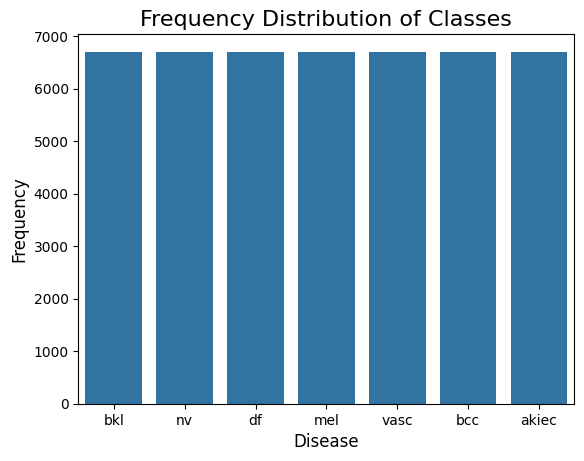

In [28]:
sns.countplot(x = 'dx', data = df)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

In [29]:
train_df, val_df = train_test_split(df, test_size=0.3)

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)#,preprocessing_function=equalize)  
val_datagen = ImageDataGenerator(rescale=1./255)#,preprocessing_function=equalize)

In [31]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_id',
    y_col='dx',  
    class_mode='categorical',  
    target_size=(IMG_SIZE, IMG_SIZE),  
    batch_size=BATCH_SIZE,
    workers=8,
    use_multiprocessing=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_id',
    y_col='dx',
    class_mode='categorical',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    workers=8,
    use_multiprocessing=True
)

Found 32854 validated image filenames belonging to 7 classes.
Found 14081 validated image filenames belonging to 7 classes.


Modelling

In [37]:
cnn_input_layer = Input(shape=(IMG_SIZE,IMG_SIZE,3),name='CNN_Input_layer')

x = Conv2D(filters= 64,kernel_size=(3,3),activation='relu',name='CNN_Layer_1')(cnn_input_layer)
x = MaxPooling2D(pool_size=(2,2),name='Maxpooling_Layer_1')(x)
x = Conv2D(filters= 64,kernel_size=(3,3),activation='relu',name='CNN_Layer_2')(x)
x = MaxPooling2D(pool_size=(2,2),name='Maxpooling_Layer_2')(x)
x = Conv2D(filters= 128,kernel_size=(3,3),activation='relu',name='CNN_Layer_3')(x)
x = MaxPooling2D(pool_size=(2,2),name='Maxpooling_Layer_3')(x)

x = Flatten(name='Flatten_Layer')(x)
x = Dense(units=128,activation='relu',name='Dense_Layer_1')(x)
# x = Dropout(0.4)(x)
x = Dense(units=64,activation='relu',name='Dense_Layer_2')(x)

cnn_output_layer = Dense(units=7,activation='softmax',dtype='float32',name='CNN_Output_Layer')(x)

cnn_model = Model(inputs=cnn_input_layer,outputs=cnn_output_layer,name='CNN_Model')

2024-07-22 16:03:43.945421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22066 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:61:00.0, compute capability: 8.9


In [38]:
cnn_model.summary()

Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CNN_Input_layer (InputLayer)    │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_Layer_1 (Conv2D)            │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpooling_Layer_1              │ (None, 63, 63, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_Layer_2 (Conv2D)            │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpooling_Layer_2              │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_Layer_3 (Conv2D)            │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpooling_Layer_3              │ (None, 14, 14, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_Output_Layer (Dense)        │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,332,679 (12.71 MB)

 Trainable params: 3,332,679 (12.71 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
cnn_model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
# steps_per_epoch = len(img_paths) // BATCH_SIZE

In [ ]:
cnn_history = cnn_model.fit(train_generator,
                                batch_size=BATCH_SIZE,
                                epochs=10,
                                validation_data=val_generator,
                                validation_batch_size=BATCH_SIZE)

In [32]:
from keras.models import Model
from keras.layers import Add, Activation, Concatenate, Conv2D, Dropout, Input
from keras.layers import Flatten, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, Dense
from keras.optimizers import Adam

In [45]:
from keras.models import Model
from keras.layers import Add, Activation, Concatenate, Conv2D, Dropout, BatchNormalization
from keras.layers import Flatten, Input, GlobalAveragePooling2D, MaxPooling2D
import keras.backend as K

def SqueezeNet1(input_shape, nb_classes, use_bypass=False, dropout_rate=0.5, compression=1.0):
    """
    Creating a SqueezeNet model with improved architecture
    
    Arguments:
        input_shape  : shape of the input images e.g. (128,128,3)
        nb_classes   : number of classes (7 in this case)
        use_bypass   : if true, bypass connections will be created at fire module 3, 5, 7, and 9 (default: False)
        dropout_rate : defines the dropout rate that is applied after the last fire module (default: 0.5)
        compression  : reduce the number of feature-maps (default: 1.0)
        
    Returns:
        Model        : Keras model instance
    """
    
    input_img = Input(shape=input_shape)

    x = Conv2D(int(96*compression), (7,7), activation='relu', strides=(2,2), padding='same', name='conv1')(input_img)
    x = BatchNormalization(name='batchnorm1')(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool1')(x)
    
    x = create_fire_module(x, int(32*compression), name='fire2')
    x = create_fire_module(x, int(32*compression), name='fire3', use_bypass=use_bypass)
    x = create_fire_module(x, int(64*compression), name='fire4')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool4')(x)
    
    x = create_fire_module(x, int(64*compression), name='fire5', use_bypass=use_bypass)
    x = create_fire_module(x, int(96*compression), name='fire6')
    x = create_fire_module(x, int(96*compression), name='fire7', use_bypass=use_bypass)
    x = create_fire_module(x, int(128*compression), name='fire8')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool8')(x)
    
    x = create_fire_module(x, int(128*compression), name='fire9', use_bypass=use_bypass)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)
        
    x = output(x, nb_classes)

    return Model(inputs=input_img, outputs=x)

def output(x, nb_classes):
    x = Conv2D(nb_classes, (1,1), strides=(1,1), padding='valid', name='conv10')(x)
    x = GlobalAveragePooling2D(name='avgpool10')(x)
    x = Dense(128, activation='relu', name='dense_final')(x)
    x = BatchNormalization(name='batchnorm_final')(x)
    x = Dropout(0.5)(x)
    x = Dense(nb_classes, activation='softmax', name='softmax')(x)  # Corrected output layer
    return x

def create_fire_module(x, nb_squeeze_filter, name, use_bypass=False):
    """
    Creates a fire module
    
    Arguments:
        x                 : input
        nb_squeeze_filter : number of filters of squeeze. The filtersize of expand is 4 times of squeeze
        use_bypass        : if True then a bypass will be added
        name              : name of module e.g. fire123
    
    Returns:
        x                 : returns a fire module
    """
    
    nb_expand_filter = 4 * nb_squeeze_filter
    squeeze    = Conv2D(nb_squeeze_filter, (1,1), activation='relu', padding='same', name='%s_squeeze'%name)(x)
    squeeze    = BatchNormalization(name='%s_batchnorm_squeeze'%name)(squeeze)
    expand_1x1 = Conv2D(nb_expand_filter, (1,1), activation='relu', padding='same', name='%s_expand_1x1'%name)(squeeze)
    expand_3x3 = Conv2D(nb_expand_filter, (3,3), activation='relu', padding='same', name='%s_expand_3x3'%name)(squeeze)
    
    axis = get_axis()
    x_ret = Concatenate(axis=axis, name='%s_concatenate'%name)([expand_1x1, expand_3x3])
    
    if use_bypass:
        x_ret = Add(name='%s_concatenate_bypass'%name)([x_ret, x])
        
    return x_ret

def get_axis():
    axis = -1 if K.image_data_format() == 'channels_last' else 1
    return axis


In [46]:
squeezeNet_model = SqueezeNet1(input_shape=(128, 128, 3), nb_classes=7)

squeezeNet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
squeezeNet_history = squeezeNet_model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_batch_size=BATCH_SIZE
)

Epoch 1/10
 29/257 ━━━━━━━━━━━━━━━━━━━━ 1:55 509ms/step - accuracy: 0.1738 - loss: 2.4291

2024-07-23 06:53:00.990869: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5500', 4 bytes spill stores, 4 bytes spill loads



257/257 ━━━━━━━━━━━━━━━━━━━━ 229s 801ms/step - accuracy: 0.3041 - loss: 1.9132 - val_accuracy: 0.1479 - val_loss: 2.5153
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 197s 753ms/step - accuracy: 0.6236 - loss: 1.0233 - val_accuracy: 0.5207 - val_loss: 1.2923
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 194s 740ms/step - accuracy: 0.7362 - loss: 0.7304 - val_accuracy: 0.5635 - val_loss: 1.4992
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 196s 750ms/step - accuracy: 0.7998 - loss: 0.5535 - val_accuracy: 0.5297 - val_loss: 2.0388
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 195s 746ms/step - accuracy: 0.8461 - loss: 0.4360 - val_accuracy: 0.5844 - val_loss: 1.5621
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 199s 761ms/step - accuracy: 0.8638 - loss: 0.3739 - val_accuracy: 0.7019 - val_loss: 1.1223
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 192s 735ms/step - accuracy: 0.8898 - loss: 0.3070 - val_accuracy: 0.5552 - val_loss: 1.7374
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 196s 750ms/step - accuracy: 0.9067 - loss: 0.25

In [39]:
from keras.regularizers import l2

In [64]:
from keras.models import Model
from keras.layers import Add, Activation, Concatenate, Conv2D, Dropout, BatchNormalization
from keras.layers import Flatten, Input, GlobalAveragePooling2D, MaxPooling2D
import keras.backend as K

def SqueezeNet3(input_shape, nb_classes, use_bypass=False, dropout_rate=0.5, compression=1.0):
    """
    Creating a SqueezeNet model with improved architecture
    
    Arguments:
        input_shape  : shape of the input images e.g. (128,128,3)
        nb_classes   : number of classes (7 in this case)
        use_bypass   : if true, bypass connections will be created at fire module 3, 5, 7, and 9 (default: False)
        dropout_rate : defines the dropout rate that is applied after the last fire module (default: 0.5)
        compression  : reduce the number of feature-maps (default: 1.0)
        
    Returns:
        Model        : Keras model instance
    """
    
    input_img = Input(shape=input_shape)

    x = Conv2D(int(96*compression), (7,7), activation='relu', strides=(3,3), padding='same', name='conv1')(input_img)
    x = BatchNormalization(name='batchnorm1')(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(3,3), name='maxpool1')(x)
    
    x = create_fire_module(x, int(32*compression), name='fire2')
    x = create_fire_module(x, int(32*compression), name='fire3', use_bypass=use_bypass)
    x = create_fire_module(x, int(64*compression), name='fire4')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(3,3), name='maxpool4')(x)
    
    x = create_fire_module(x, int(64*compression), name='fire5', use_bypass=use_bypass)
    x = create_fire_module(x, int(96*compression), name='fire6')
    x = create_fire_module(x, int(96*compression), name='fire7', use_bypass=use_bypass)
    x = create_fire_module(x, int(128*compression), name='fire8')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(3,3), name='maxpool8')(x)
    
    x = create_fire_module(x, int(128*compression), name='fire9', use_bypass=use_bypass)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)
        
    x = output(x, nb_classes)

    return Model(inputs=input_img, outputs=x)

def output(x, nb_classes):
    x = Conv2D(nb_classes, (1,1), strides=(1,1), padding='valid', name='conv10')(x)
    x = GlobalAveragePooling2D(name='avgpool10')(x)
    x = Dense(128, activation='relu', name='dense_final', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization(name='batchnorm_final')(x)
    x = Dropout(0.6)(x)
    x = Dense(nb_classes, activation='softmax', name='softmax')(x)  # Corrected output layer
    return x

def create_fire_module(x, nb_squeeze_filter, name, use_bypass=False):
    """
    Creates a fire module
    
    Arguments:
        x                 : input
        nb_squeeze_filter : number of filters of squeeze. The filtersize of expand is 4 times of squeeze
        use_bypass        : if True then a bypass will be added
        name              : name of module e.g. fire123
    
    Returns:
        x                 : returns a fire module
    """
    
    nb_expand_filter = 4 * nb_squeeze_filter
    squeeze    = Conv2D(nb_squeeze_filter, (1,1), activation='relu', padding='same', name='%s_squeeze'%name)(x)
    squeeze    = BatchNormalization(name='%s_batchnorm_squeeze'%name)(squeeze)
    expand_1x1 = Conv2D(nb_expand_filter, (1,1), activation='relu', padding='same', name='%s_expand_1x1'%name)(squeeze)
    expand_3x3 = Conv2D(nb_expand_filter, (3,3), activation='relu', padding='same', name='%s_expand_3x3'%name)(squeeze)
    
    axis = get_axis()
    x_ret = Concatenate(axis=axis, name='%s_concatenate'%name)([expand_1x1, expand_3x3])
    
    if use_bypass:
        x_ret = Add(name='%s_concatenate_bypass'%name)([x_ret, x])
        
    return x_ret

def get_axis():
    axis = -1 if K.image_data_format() == 'channels_last' else 1
    return axis


In [50]:
squeezeNet_model2 = SqueezeNet3(input_shape=(128, 128, 3), nb_classes=7)
optimizer = Adam(learning_rate=1e-4)
squeezeNet_model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
squeezeNet_history1 = squeezeNet_model1.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_batch_size=BATCH_SIZE
)

Epoch 1/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 224s 787ms/step - accuracy: 0.1900 - loss: 2.8314 - val_accuracy: 0.1449 - val_loss: 2.2089
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 197s 750ms/step - accuracy: 0.2729 - loss: 2.0263 - val_accuracy: 0.1968 - val_loss: 2.0415
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 192s 733ms/step - accuracy: 0.4029 - loss: 1.6228 - val_accuracy: 0.4474 - val_loss: 1.4928
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 196s 748ms/step - accuracy: 0.5231 - loss: 1.3185 - val_accuracy: 0.4345 - val_loss: 1.5740
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 197s 754ms/step - accuracy: 0.6482 - loss: 1.0207 - val_accuracy: 0.5698 - val_loss: 1.2130
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 197s 753ms/step - accuracy: 0.7624 - loss: 0.7674 - val_accuracy: 0.5691 - val_loss: 1.2578
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 196s 748ms/step - accuracy: 0.8423 - loss: 0.5680 - val_accuracy: 0.4716 - val_loss: 1.8890
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 198s 757ms/step - accuracy: 0.8886 -

In [35]:
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 3:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())

lr_scheduler = LearningRateScheduler(scheduler)


In [36]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [68]:
squeezeNet_model3 = SqueezeNet2(input_shape=(128, 128, 3), nb_classes=7)


In [69]:
squeezeNet_model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
squeezeNet_history3= squeezeNet_model3.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 217s 777ms/step - accuracy: 0.1761 - loss: 2.8334 - val_accuracy: 0.1404 - val_loss: 2.1644 - learning_rate: 1.0000e-04
Epoch 2/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 195s 745ms/step - accuracy: 0.2758 - loss: 2.0690 - val_accuracy: 0.1506 - val_loss: 2.4145 - learning_rate: 1.0000e-04
Epoch 3/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 196s 748ms/step - accuracy: 0.3997 - loss: 1.6908 - val_accuracy: 0.4693 - val_loss: 1.4555 - learning_rate: 1.0000e-04
Epoch 4/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 195s 744ms/step - accuracy: 0.5087 - loss: 1.3681 - val_accuracy: 0.4602 - val_loss: 1.4770 - learning_rate: 9.0484e-05
Epoch 5/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 192s 732ms/step - accuracy: 0.6625 - loss: 1.0195 - val_accuracy: 0.6100 - val_loss: 1.1512 - learning_rate: 8.1873e-05
Epoch 6/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 192s 732ms/step - accuracy: 0.7861 - loss: 0.7282 - val_accuracy: 0.7765 - val_loss: 0.7613 - learning_rate: 7.4082e-05
Epoch 7/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 

Squeezenet 4th attempt

In [33]:
from keras.models import Model
from keras.layers import Add, Activation, Concatenate, Conv2D, Dropout, BatchNormalization
from keras.layers import Flatten, Input, GlobalAveragePooling2D, MaxPooling2D
import keras.backend as K

def SqueezeNet4(input_shape, nb_classes, use_bypass=False, dropout_rate=0.6, compression=1.0):
    """
    Creating a SqueezeNet model with improved architecture
    
    Arguments:
        input_shape  : shape of the input images e.g. (128,128,3)
        nb_classes   : number of classes (7 in this case)
        use_bypass   : if true, bypass connections will be created at fire module 3, 5, 7, and 9 (default: False)
        dropout_rate : defines the dropout rate that is applied after the last fire module (default: 0.5)
        compression  : reduce the number of feature-maps (default: 1.0)
        
    Returns:
        Model        : Keras model instance
    """
    
    input_img = Input(shape=input_shape)

    x = Conv2D(int(96*compression), (7,7), activation='relu', strides=(3,3), padding='same', name='conv1')(input_img)
    x = BatchNormalization(name='batchnorm1')(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(3,3), name='maxpool1')(x)
    
    x = create_fire_module(x, int(32*compression), name='fire2')
    x = create_fire_module(x, int(32*compression), name='fire3', use_bypass=use_bypass)
    x = create_fire_module(x, int(64*compression), name='fire4')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(3,3), name='maxpool4')(x)
    
    x = create_fire_module(x, int(64*compression), name='fire5', use_bypass=use_bypass)
    x = create_fire_module(x, int(96*compression), name='fire6')
    x = create_fire_module(x, int(96*compression), name='fire7', use_bypass=use_bypass)
    x = create_fire_module(x, int(128*compression), name='fire8')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(3,3), name='maxpool8')(x)
    
    x = create_fire_module(x, int(128*compression), name='fire9', use_bypass=use_bypass)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)
        
    x = output(x, nb_classes)

    return Model(inputs=input_img, outputs=x)

def output(x, nb_classes):
    x = Conv2D(nb_classes, (1,1), strides=(1,1), padding='valid', name='conv10')(x)
    x = GlobalAveragePooling2D(name='avgpool10')(x)
    x = Dense(128, activation='relu', name='dense_final', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization(name='batchnorm_final')(x)
    x = Dropout(0.6)(x)
    x = Dense(nb_classes, activation='softmax', name='softmax')(x)  # Corrected output layer
    return x

def create_fire_module(x, nb_squeeze_filter, name, use_bypass=False):
    """
    Creates a fire module
    
    Arguments:
        x                 : input
        nb_squeeze_filter : number of filters of squeeze. The filtersize of expand is 4 times of squeeze
        use_bypass        : if True then a bypass will be added
        name              : name of module e.g. fire123
    
    Returns:
        x                 : returns a fire module
    """
    
    nb_expand_filter = 4 * nb_squeeze_filter
    squeeze    = Conv2D(nb_squeeze_filter, (1,1), activation='relu', padding='same', name='%s_squeeze'%name)(x)
    squeeze    = BatchNormalization(name='%s_batchnorm_squeeze'%name)(squeeze)
    expand_1x1 = Conv2D(nb_expand_filter, (1,1), activation='relu', padding='same', name='%s_expand_1x1'%name)(squeeze)
    expand_3x3 = Conv2D(nb_expand_filter, (3,3), activation='relu', padding='same', name='%s_expand_3x3'%name)(squeeze)
    
    axis = get_axis()
    x_ret = Concatenate(axis=axis, name='%s_concatenate'%name)([expand_1x1, expand_3x3])
    
    if use_bypass:
        x_ret = Add(name='%s_concatenate_bypass'%name)([x_ret, x])
        
    return x_ret

def get_axis():
    axis = -1 if K.image_data_format() == 'channels_last' else 1
    return axis


In [40]:
# Model with updated dropout rate
squeezeNet_model4 = SqueezeNet4(input_shape=(128, 128, 3), nb_classes=7)

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-07)




In [41]:
squeezeNet_model4.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 43, 43,    │     14,208 │ input_layer_2[0]… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnorm1          │ (None, 43, 43,    │        384 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1            │ (None, 14, 14,    │          0 │ batchnorm1[0][0]  │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_squeeze       │ (None, 14, 14,    │      3,104 │ maxpool1[0][0]    │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_batchnorm_sq… │ (None, 14, 14,    │        128 │ fire2_squeeze[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_expand_1x1    │ (None, 14, 14,    │      4,224 │ fire2_batchnorm_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_expand_3x3    │ (None, 14, 14,    │     36,992 │ fire2_batchnorm_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire2_concatenate   │ (None, 14, 14,    │          0 │ fire2_expand_1x1… │
│ (Concatenate)       │ 256)              │            │ fire2_expand_3x3… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_squeeze       │ (None, 14, 14,    │      8,224 │ fire2_concatenat… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_batchnorm_sq… │ (None, 14, 14,    │        128 │ fire3_squeeze[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_expand_1x1    │ (None, 14, 14,    │      4,224 │ fire3_batchnorm_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_expand_3x3    │ (None, 14, 14,    │     36,992 │ fire3_batchnorm_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire3_concatenate   │ (None, 14, 14,    │          0 │ fire3_expand_1x1… │
│ (Concatenate)       │ 256)              │            │ fire3_expand_3x3… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire4_squeeze       │ (None, 14, 14,    │     16,448 │ fire3_concatenat… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire4_batchnorm_sq… │ (None, 14, 14,    │        256 │ fire4_squeeze[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire4_expand_1x1    │ (None, 14, 14,    │     16,640 │ fire4_batchnorm_

 Total params: 2,902,798 (11.07 MB)

 Trainable params: 2,901,070 (11.07 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [42]:
squeezeNet_model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 3:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())

lr_scheduler = LearningRateScheduler(scheduler)


In [44]:
# Training
squeezeNet_history4 = squeezeNet_model4.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[lr_scheduler, reduce_lr, early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 837s 3s/step - accuracy: 0.1653 - loss: 2.9620 - val_accuracy: 0.1519 - val_loss: 2.1293 - learning_rate: 1.0000e-04
Epoch 2/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 862s 3s/step - accuracy: 0.2520 - loss: 2.1186 - val_accuracy: 0.1863 - val_loss: 2.1334 - learning_rate: 1.0000e-04
Epoch 3/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 964s 4s/step - accuracy: 0.3638 - loss: 1.7421 - val_accuracy: 0.4007 - val_loss: 1.6648 - learning_rate: 1.0000e-04
Epoch 4/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1153s 4s/step - accuracy: 0.5229 - loss: 1.3741 - val_accuracy: 0.5569 - val_loss: 1.2887 - learning_rate: 9.0484e-05
Epoch 5/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 990s 4s/step - accuracy: 0.6556 - loss: 1.0363 - val_accuracy: 0.7223 - val_loss: 0.9067 - learning_rate: 8.1873e-05
Epoch 6/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1017s 4s/step - accuracy: 0.7586 - loss: 0.7805 - val_accuracy: 0.5620 - val_loss: 1.3264 - learning_rate: 7.4082e-05
Epoch 7/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 1055s 4s/step - 

In [46]:
# Save the trained model
squeezeNet_model4.save('Skin_Cancer.h5')  # Save in HDF5 format

In [47]:
# prediction
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [48]:
# Load the trained model
model = tf.keras.models.load_model('Skin_Cancer.h5')  # Ensure the model file is in the same directory

In [49]:
# Define class labels and corresponding disease names
class_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
disease_info = {
    'akiec': ('Actinic Keratosis', 'It lies between malignant/benign and indicates pre-cancerous symptoms and is low risk.'),
    'bcc': ('Basal Cell Carcinoma', 'Variant of Malignant and Highly risky.'),
    'bkl': ('Benign Keratosis', 'Variant of Benign and not risky.'),
    'df': ('Dermatofibroma', 'Variant of Benign and not risky.'),
    'mel': ('Melanoma', 'Variant of Malignant, very serious and aggressive, and highly risky.'),
    'nv': ('Melanocytic Nevus', 'Variant of Benign and not risky.'),
    'vasc': ('Vascular Lesion', 'Variant of Benign and not risky.')
}

In [50]:
def preprocess_image(img_path):
    """Load and preprocess image for model prediction"""
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to model's expected input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img_array

In [51]:
def predict_skin_cancer(img_path):
    """Predict the skin disease from an image"""
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    confidence = np.max(prediction) * 100  # Convert to percentage
    
    if confidence < 50:
        result = "No disease detected"
        disease_details = "The uploaded image does not indicate the presence of skin cancer."
    else:
        predicted_class = np.argmax(prediction)  # Get class index
        predicted_label = class_labels[predicted_class]
        disease_name, disease_details = disease_info[predicted_label]  # Get disease info
        result = disease_name
    
    return result, confidence, disease_details

In [52]:
# Upload an image for testing
img_path = "1.jpg"  # Change this to the actual image path
result, confidence, disease_details = predict_skin_cancer(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


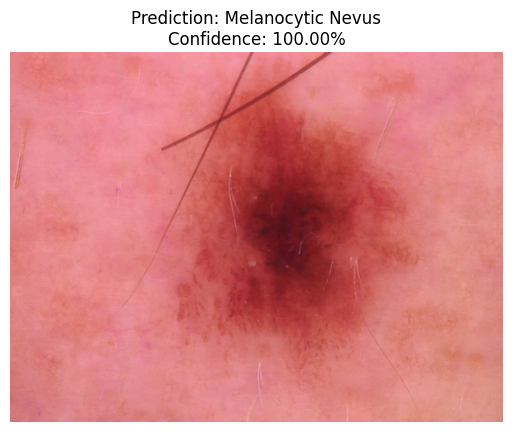

Prediction: Melanocytic Nevus
Confidence: 100.00%
Details: Variant of Benign and not risky.


In [54]:
# Display the image and prediction
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Prediction: {result}\nConfidence: {confidence:.2f}%")
plt.show()

print(f"Prediction: {result}")
print(f"Confidence: {confidence:.2f}%")
print(f"Details: {disease_details}")

SquuezeNet_light_weight

In [76]:
from keras.models import Model
from keras.layers import Add, Activation, Concatenate, Conv2D, Dropout, BatchNormalization, Dense
from keras.layers import Flatten, Input, GlobalAveragePooling2D, MaxPooling2D
import keras.backend as K
from keras.regularizers import l2  # Import the l2 regularizer
from keras.optimizers import Adam

def SqueezeNetLite(input_shape, nb_classes, use_bypass=False, dropout_rate=0.6, compression=1.0):
    """
    Creating a lighter SqueezeNet model with simplified architecture
    
    Arguments:
        input_shape  : shape of the input images e.g. (128,128,3)
        nb_classes   : number of classes (7 in this case)
        use_bypass   : if true, bypass connections will be created at fire module 3, 5, 7, and 9 (default: False)
        dropout_rate : defines the dropout rate that is applied after the last fire module (default: 0.5)
        compression  : reduce the number of feature-maps (default: 1.0)
        
    Returns:
        Model        : Keras model instance
    """
    
    input_img = Input(shape=input_shape)

    x = Conv2D(int(64*compression), (7,7), activation='relu', strides=(3,3), padding='same', name='conv1')(input_img)  # Reduced to 64 filters
    x = BatchNormalization(name='batchnorm1')(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(3,3), name='maxpool1')(x)
    
    x = create_fire_module(x, int(16*compression), name='fire2')  # Reduced number of filters
    x = create_fire_module(x, int(16*compression), name='fire3', use_bypass=use_bypass)
    x = create_fire_module(x, int(32*compression), name='fire4')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool4')(x)
    
    x = create_fire_module(x, int(32*compression), name='fire5', use_bypass=use_bypass)
    x = create_fire_module(x, int(48*compression), name='fire6')
    
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='maxpool6')(x)
    
    x = create_fire_module(x, int(48*compression), name='fire7', use_bypass=use_bypass)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)
        
    x = output(x, nb_classes)

    return Model(inputs=input_img, outputs=x)

def output(x, nb_classes):
    x = Conv2D(nb_classes, (1,1), strides=(1,1), padding='valid', name='conv10')(x)
    x = GlobalAveragePooling2D(name='avgpool10')(x)
    x = Dense(128, activation='relu', name='dense_final', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization(name='batchnorm_final')(x)
    x = Dropout(0.5)(x)  # Reduced dropout rate
    x = Dense(nb_classes, activation='softmax', name='softmax')(x)  # Corrected output layer
    return x

def create_fire_module(x, nb_squeeze_filter, name, use_bypass=False):
    """
    Creates a fire module
    
    Arguments:
        x                 : input
        nb_squeeze_filter : number of filters of squeeze. The filtersize of expand is 4 times of squeeze
        use_bypass        : if True then a bypass will be added
        name              : name of module e.g. fire123
    
    Returns:
        x                 : returns a fire module
    """
    
    nb_expand_filter = 4 * nb_squeeze_filter
    squeeze    = Conv2D(nb_squeeze_filter, (1,1), activation='relu', padding='same', name='%s_squeeze'%name)(x)
    squeeze    = BatchNormalization(name='%s_batchnorm_squeeze'%name)(squeeze)
    expand_1x1 = Conv2D(nb_expand_filter, (1,1), activation='relu', padding='same', name='%s_expand_1x1'%name)(squeeze)
    expand_3x3 = Conv2D(nb_expand_filter, (3,3), activation='relu', padding='same', name='%s_expand_3x3'%name)(squeeze)
    
    axis = get_axis()
    x_ret = Concatenate(axis=axis, name='%s_concatenate'%name)([expand_1x1, expand_3x3])
    
    if use_bypass:
        x_ret = Add(name='%s_concatenate_bypass'%name)([x_ret, x])
        
    return x_ret

def get_axis():
    axis = -1 if K.image_data_format() == 'channels_last' else 1
    return axis



In [77]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 3:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())

lr_scheduler = LearningRateScheduler(scheduler)


In [78]:
# Instantiate and compile the model
squeezeNet_lite_model = SqueezeNetLite(input_shape=(128, 128, 3), nb_classes=7)

In [79]:
optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [80]:
squeezeNet_lite_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
squeezeNet_lite_history = squeezeNet_lite_model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=val_generator,
    validation_batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, reduce_lr, early_stopping]
)


Epoch 1/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 218s 778ms/step - accuracy: 0.2100 - loss: 2.4479 - val_accuracy: 0.1404 - val_loss: 2.0841 - learning_rate: 1.0000e-04
Epoch 2/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 195s 747ms/step - accuracy: 0.3913 - loss: 1.7217 - val_accuracy: 0.2369 - val_loss: 1.9981 - learning_rate: 1.0000e-04
Epoch 3/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 193s 737ms/step - accuracy: 0.4931 - loss: 1.4374 - val_accuracy: 0.5316 - val_loss: 1.3280 - learning_rate: 1.0000e-04
Epoch 4/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 194s 742ms/step - accuracy: 0.6105 - loss: 1.1732 - val_accuracy: 0.5727 - val_loss: 1.2285 - learning_rate: 9.0484e-05
Epoch 5/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 194s 743ms/step - accuracy: 0.7071 - loss: 0.9267 - val_accuracy: 0.6289 - val_loss: 1.0951 - learning_rate: 8.1873e-05
Epoch 6/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 193s 738ms/step - accuracy: 0.7735 - loss: 0.7477 - val_accuracy: 0.6850 - val_loss: 0.9627 - learning_rate: 7.4082e-05
Epoch 7/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

In [32]:
# Define depthwise separable convolution block
def depthwise_separable_conv(x, filters, strides=1, block_name=""):
    x = layers.DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', name=f'{block_name}_depthwise')(x)
    x = layers.BatchNormalization(name=f'{block_name}_bn1')(x)
    x = layers.ReLU(name=f'{block_name}_relu1')(x)
    x = layers.Conv2D(filters, kernel_size=1, padding='same', name=f'{block_name}_pointwise')(x)
    x = layers.BatchNormalization(name=f'{block_name}_bn2')(x)
    x = layers.ReLU(name=f'{block_name}_relu2')(x)
    return x

In [39]:
def build_mnasnet_custom(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape, name='Input_Layer')
    
    # Initial Convolutional Layer
    x = layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu', name='Initial_Conv')(inputs)
    x = layers.BatchNormalization(name='Initial_BN')(x)
    
    # MNASNet-inspired blocks
    x = depthwise_separable_conv(x, filters=16, strides=1, block_name="Block1")       # Block 1
    x = depthwise_separable_conv(x, filters=24, strides=2, block_name="Block2")       # Block 2
    x = depthwise_separable_conv(x, filters=24, strides=1, block_name="Block2_repeat")

    x = depthwise_separable_conv(x, filters=40, strides=2, block_name="Block3")       # Block 3
    x = depthwise_separable_conv(x, filters=40, strides=1, block_name="Block3_repeat")

    x = depthwise_separable_conv(x, filters=80, strides=2, block_name="Block4")       # Block 4
    x = depthwise_separable_conv(x, filters=80, strides=1, block_name="Block4_repeat")
    
    x = depthwise_separable_conv(x, filters=96, strides=1, block_name="Block5")       # Block 5
    x = depthwise_separable_conv(x, filters=96, strides=1, block_name="Block5_repeat")

    x = depthwise_separable_conv(x, filters=192, strides=2, block_name="Block6")      # Block 6
    x = depthwise_separable_conv(x, filters=192, strides=1, block_name="Block6_repeat")

    x = depthwise_separable_conv(x, filters=320, strides=1, block_name="Block7")      # Block 7

    # Global average pooling and classification layer
    x = layers.GlobalAveragePooling2D(name='Global_Avg_Pool')(x)
    x = layers.Dropout(0.4, name='Dropout')(x)  # Dropout for regularization
    outputs = layers.Dense(num_classes, activation='softmax', name='Output_Layer')(x)

    # Build model
    model = Model(inputs, outputs, name='Custom_MNASNet_Model')
    return model

In [36]:
# Define model parameters
input_shape = (128, 128, 3)  # Assuming the input image size is 224x224
num_classes = 7  # Adjust based on your dataset

In [47]:
# Build and compile model
model_mnas = build_mnasnet_custom(input_shape=input_shape, num_classes=num_classes)
model_mnas.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 3:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())

lr_scheduler = LearningRateScheduler(scheduler)

In [49]:
# Print model summary
model_mnas.summary()

Model: "Custom_MNASNet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Initial_Conv (Conv2D)           │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Initial_BN (BatchNormalization) │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_depthwise                │ (None, 64, 64, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_bn1 (BatchNormalization) │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_relu1 (ReLU)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_pointwise (Conv2D)       │ (None, 64, 64, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_bn2 (BatchNormalization) │ (None, 64, 64, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_relu2 (ReLU)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_depthwise                │ (None, 32, 32, 16)     │           160 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_bn1 (BatchNormalization) │ (None, 32, 32, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_relu1 (ReLU)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_pointwise (Conv2D)       │ (None, 32, 32, 24)     │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_bn2 (BatchNormalization) │ (None, 32, 32, 24)     │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_relu2 (ReLU)             │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_depthwise         │ (None, 32, 32, 24)     │           240 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_bn1               │ (None, 32, 32, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_relu1 (ReLU)      │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_pointwise         │ (None, 32, 32, 24)     │           600 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_bn2               │ (None, 32, 32, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_relu2 (ReLU)      │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block3_depthwise                │ (None, 16, 16, 24)     │           24

 Total params: 169,303 (661.34 KB)

 Trainable params: 165,015 (644.59 KB)

 Non-trainable params: 4,288 (16.75 KB)

In [52]:
# Train the model
mnas_history1 = model_mnas.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=15,
    validation_data=val_generator,
    validation_batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, reduce_lr, early_stopping]
)


Epoch 1/15
 36/257 ━━━━━━━━━━━━━━━━━━━━ 1:53 512ms/step - accuracy: 0.9914 - loss: 0.0293

KeyboardInterrupt: 

In [33]:
# Define depthwise separable convolution block
def depthwise_separable_conv1(x, filters, strides=1, block_name=""):
    x = layers.DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', name=f'{block_name}_depthwise')(x)
    x = layers.BatchNormalization(name=f'{block_name}_bn1')(x)
    x = layers.ReLU(name=f'{block_name}_relu1')(x)
    x = layers.Conv2D(filters, kernel_size=1, padding='same', name=f'{block_name}_pointwise')(x)
    x = layers.BatchNormalization(name=f'{block_name}_bn2')(x)
    x = layers.ReLU(name=f'{block_name}_relu2')(x)
    return x

In [34]:
def build_mnasnet_custom1(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape, name='Input_Layer')
    
    # Initial Convolutional Layer
    x = layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu', name='Initial_Conv')(inputs)
    x = layers.BatchNormalization(name='Initial_BN')(x)
    
    # MNASNet-inspired blocks
    x = depthwise_separable_conv1(x, filters=16, strides=1, block_name="Block1")       # Block 1
    x = depthwise_separable_conv1(x, filters=24, strides=2, block_name="Block2")       # Block 2
    x = depthwise_separable_conv1(x, filters=24, strides=1, block_name="Block2_repeat")

    x = depthwise_separable_conv1(x, filters=40, strides=2, block_name="Block3")       # Block 3
    x = depthwise_separable_conv1(x, filters=40, strides=1, block_name="Block3_repeat")

    x = depthwise_separable_conv1(x, filters=80, strides=2, block_name="Block4")       # Block 4
    x = depthwise_separable_conv1(x, filters=80, strides=1, block_name="Block4_repeat")
    
    x = depthwise_separable_conv1(x, filters=96, strides=1, block_name="Block5")       # Block 5
    x = depthwise_separable_conv1(x, filters=96, strides=1, block_name="Block5_repeat")

    x = depthwise_separable_conv1(x, filters=192, strides=2, block_name="Block6")      # Block 6
    x = depthwise_separable_conv1(x, filters=192, strides=1, block_name="Block6_repeat")

    x = depthwise_separable_conv1(x, filters=320, strides=1, block_name="Block7")      # Block 7

    # Global average pooling and classification layer
    x = layers.GlobalAveragePooling2D(name='Global_Avg_Pool')(x)
    x = layers.Dropout(0.4, name='Dropout')(x)  # Dropout for regularization
    outputs = layers.Dense(num_classes, activation='softmax', name='Output_Layer')(x)

    # Build model
    model1 = Model(inputs, outputs, name='Custom_MNASNet_Model')
    return model1

In [37]:
# Build and compile model
model_mnas1 = build_mnasnet_custom1(input_shape=input_shape, num_classes=num_classes)
model_mnas1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

W0000 00:00:1730945264.286159     402 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [38]:
# Print model summary
model_mnas1.summary()

Model: "Custom_MNASNet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Initial_Conv (Conv2D)           │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Initial_BN (BatchNormalization) │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_depthwise                │ (None, 64, 64, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_bn1 (BatchNormalization) │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_relu1 (ReLU)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_pointwise (Conv2D)       │ (None, 64, 64, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_bn2 (BatchNormalization) │ (None, 64, 64, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block1_relu2 (ReLU)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_depthwise                │ (None, 32, 32, 16)     │           160 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_bn1 (BatchNormalization) │ (None, 32, 32, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_relu1 (ReLU)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_pointwise (Conv2D)       │ (None, 32, 32, 24)     │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_bn2 (BatchNormalization) │ (None, 32, 32, 24)     │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_relu2 (ReLU)             │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_depthwise         │ (None, 32, 32, 24)     │           240 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_bn1               │ (None, 32, 32, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_relu1 (ReLU)      │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_pointwise         │ (None, 32, 32, 24)     │           600 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_bn2               │ (None, 32, 32, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block2_repeat_relu2 (ReLU)      │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Block3_depthwise                │ (None, 16, 16, 24)     │           24

 Total params: 169,303 (661.34 KB)

 Trainable params: 165,015 (644.59 KB)

 Non-trainable params: 4,288 (16.75 KB)

In [41]:
# Train the model
mnas_history11 = model_mnas1.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=17,
    validation_data=val_generator,
    validation_batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, reduce_lr, early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/17
257/257 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.2710 - loss: 1.8055 - val_accuracy: 0.1457 - val_loss: 2.0664 - learning_rate: 0.0010
Epoch 2/17
257/257 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.6255 - loss: 0.9808 - val_accuracy: 0.1762 - val_loss: 2.4843 - learning_rate: 0.0010
Epoch 3/17
257/257 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.7457 - loss: 0.6777 - val_accuracy: 0.5489 - val_loss: 1.4520 - learning_rate: 0.0010
Epoch 4/17
257/257 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.8024 - loss: 0.5340 - val_accuracy: 0.5854 - val_loss: 1.3889 - learning_rate: 9.0484e-04
Epoch 5/17
257/257 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.8485 - loss: 0.4057 - val_accuracy: 0.6384 - val_loss: 1.3224 - learning_rate: 8.1873e-04
Epoch 6/17
257/257 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.9173 - loss: 0.2376 - val_accuracy: 0.7753 - val_loss: 0.7229 - learning_rate: 6.7032e-04
Epoch 8/17
257/257 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.931

In [58]:
a=10